# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,625 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [2]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=133e82077dd5413bb3cd7b29503de1c11a79b1ba1fe045b52f82ff00e00e3845
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

In [4]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

seed = 42
my_seed_everywhere(seed)

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

In [ ]:
# !sudo apt-get install -y fonts-nanum

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
# !sudo apt-get install -y fonts-nanum

In [ ]:
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# print(font_name)
# plt.rcParams['font.family']=font_name
# assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

### 1-4. 구글드라이브 연결(Colab)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [6]:
import scipy
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/'
bigram_x_train = scipy.sparse.load_npz(data_path + 'bigram_x_train.npz').toarray()
bigram_x_val = scipy.sparse.load_npz(data_path + 'bigram_x_val.npz').toarray()
y_train = pd.read_csv(data_path + 'y_train.csv')['label']
y_val = pd.read_csv(data_path + 'y_val.csv')['label']
bigram_x_train.shape, bigram_x_val.shape, y_train.shape, y_val.shape

((2964, 55837), (742, 55837), (2964,), (742,))

In [7]:
seq_x_train = np.load(data_path + 'seq_x_train.npy')
seq_x_val = np.load(data_path + 'seq_x_val.npy')
seq_x_train.shape, seq_x_val.shape

((2964, 400), (742, 400))

In [8]:
w2v_x_train = np.load(data_path +'w2v_x_train.npy')
w2v_x_val = np.load(data_path +'w2v_x_val.npy')
w2v_x_train.shape, w2v_x_val.shape

((2964, 100), (742, 100))

## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

### 3-1. Model 1

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
%%time
model = LGBMClassifier(random_state=2023)
model.fit(bigram_x_train, y_train)

CPU times: user 2.07 s, sys: 321 ms, total: 2.39 s
Wall time: 1.62 s


LGBMClassifier(random_state=2023)

In [ ]:
y_pred = model.predict(bigram_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       317
           1       0.40      0.22      0.29       147
           2       0.51      0.37      0.43       146
           3       0.51      0.42      0.46       112
           4       0.67      0.60      0.63        20

    accuracy                           0.52       742
   macro avg       0.53      0.48      0.49       742
weighted avg       0.51      0.52      0.50       742



In [ ]:
# word2vec
%%time
model = LGBMClassifier(random_state=2023)
model.fit(w2v_x_train, y_train)

y_pred = model.predict(w2v_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       317
           1       0.38      0.22      0.28       147
           2       0.39      0.41      0.40       146
           3       0.56      0.62      0.59       112
           4       0.25      0.05      0.08        20

    accuracy                           0.54       742
   macro avg       0.44      0.41      0.41       742
weighted avg       0.52      0.54      0.52       742

CPU times: user 8.58 s, sys: 67.1 ms, total: 8.65 s
Wall time: 4.81 s


### 3-2. Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model = RandomForestClassifier(random_state=2023)
model.fit(bigram_x_train, y_train)

CPU times: user 1min 23s, sys: 221 ms, total: 1min 23s
Wall time: 1min 23s


RandomForestClassifier(random_state=2023)

In [ ]:
y_pred = model.predict(bigram_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71       317
           1       0.96      0.31      0.46       147
           2       0.84      0.25      0.38       146
           3       0.87      0.54      0.66       112
           4       0.83      0.75      0.79        20

    accuracy                           0.63       742
   macro avg       0.81      0.56      0.60       742
weighted avg       0.74      0.63      0.59       742



In [ ]:
# word2vec
%%time
model = RandomForestClassifier(random_state=2023)
model.fit(w2v_x_train, y_train)

y_pred = model.predict(w2v_x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       317
           1       0.39      0.22      0.28       147
           2       0.43      0.40      0.42       146
           3       0.54      0.66      0.60       112
           4       0.14      0.05      0.07        20

    accuracy                           0.55       742
   macro avg       0.43      0.42      0.41       742
weighted avg       0.52      0.55      0.52       742

CPU times: user 2.33 s, sys: 5.7 ms, total: 2.34 s
Wall time: 2.33 s


### 3-3. Model 3

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
%%time
moel = CatBoostClassifier()
model.fit(bigram_x_train, y_train)
preds_class = model.predict(bigram_x_val)
preds_proba = model.predict_proba(bigram_x_val)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 2 3 2 0 0 0 3 0 2 0 1 3 0 0 0 3 3 0 0
 0 2 0 0 0 3 0 0 0 0 0 0 0 0 4 0 0 2 0 3 1 0 0 0 0 0 0 0 0 0 1 3 0 2 0 0 0
 0 3 0 3 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 2 0 0 0 4 3 0 0 0 4 0 0 0 0 0 0
 0 0 1 1 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 3 0 1 3 1
 0 3 4 0 3 0 0 0 0 3 2 0 0 0 0 0 2 1 0 2 0 0 0 2 2 0 0 0 3 2 0 0 0 3 0 0 0
 3 0 0 4 0 2 3 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 1 0 1 0 0 0 0 0 0 3 3 0 2 0 0
 0 0 0 0 0 4 0 0 2 0 0 0 3 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 4 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 3 0 0 3 0 0 3 1 0 0 0 0 1 0
 0 3 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0
 0 2 0 0 0 0 2 3 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 0 0 0 3 0 0 1 0 0 0 0 0 0
 0 1 0 3 0 0 0 1 0 1 0 0 0 3 1 0 0 0 0 2 0 3 0 0 0 1 0 3 0 0 0 0 0 0 0 3 0
 0 0 4 3 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 3 0 0 0 3 4 0 0 3 0 0 0 0 0 0 1 0 0
 2 0 3 0 1 3 0 0

In [ ]:
print(classification_report(y_val, preds_class))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71       317
           1       0.96      0.31      0.46       147
           2       0.84      0.25      0.38       146
           3       0.87      0.54      0.66       112
           4       0.83      0.75      0.79        20

    accuracy                           0.63       742
   macro avg       0.81      0.56      0.60       742
weighted avg       0.74      0.63      0.59       742



In [ ]:
%%time
moel = CatBoostClassifier()
model.fit(w2v_x_train, y_train)
preds_class = model.predict(w2v_x_val)
print(classification_report(y_val, preds_class))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       317
           1       0.39      0.22      0.28       147
           2       0.43      0.40      0.42       146
           3       0.54      0.66      0.60       112
           4       0.14      0.05      0.07        20

    accuracy                           0.55       742
   macro avg       0.43      0.42      0.41       742
weighted avg       0.52      0.55      0.52       742

CPU times: user 2.35 s, sys: 9.8 ms, total: 2.36 s
Wall time: 2.36 s


### 3-4. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [9]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### 4-1. DNN

In [ ]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense (Dense)               (None, 64)                25664     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 68,293
Trainable params: 68,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 2s 6ms/step - loss: 42.9853 - accuracy: 0.3087 - val_loss: 19.4618 - val_accuracy: 0.3194
Epoch 2/1000
93/93 [==============================] - 0s 4ms/step - loss: 11.4603 - accuracy: 0.4076 - val_loss: 14.5005 - val_accuracy: 0.3019
Epoch 3/1000
93/93 [==============================] - 1s 7ms/step - loss: 6.3549 - accuracy: 0.5034 - val_loss: 12.7832 - val_accuracy: 0.3302
Epoch 4/1000
93/93 [==============================] - 1s 7ms/step - loss: 3.8559 - accuracy: 0.5641 - val_loss: 12.1468 - val_accuracy: 0.3396
Epoch 5/1000
93/93 [==============================] - 1s 6ms/step - loss: 2.6156 - accuracy: 0.6333 - val_loss: 11.2531 - val_accuracy: 0.2938
Epoch 6/1000
93/93 [==============================] - 1s 6ms/step - loss: 1.5660 - accuracy: 0.7051 - val_loss: 10.6220 - val_accuracy: 0.3248
Epoch 7/1000
93/93 [==============================] - 1s 6ms/step - loss: 1.0768 - accuracy: 0.7483 - val_loss: 10.4481 - val_accuracy: 0.31

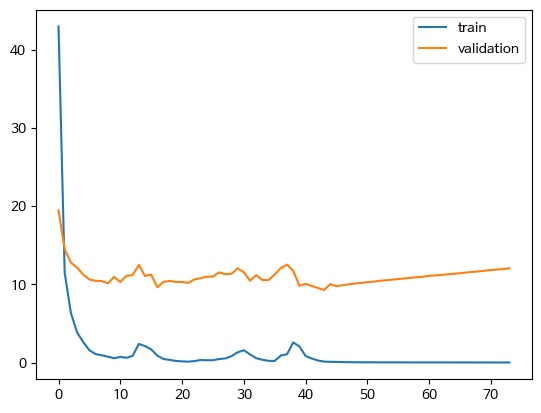

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,093
Trainable params: 49,093
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 2s 6ms/step - loss: 1.2285 - accuracy: 0.4872 - val_loss: 1.1818 - val_accuracy: 0.4973
Epoch 2/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1827 - accuracy: 0.5024 - val_loss: 1.1691 - val_accuracy: 0.4973
Epoch 3/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1632 - accuracy: 0.5135 - val_loss: 1.1698 - val_accuracy: 0.4852
Epoch 4/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1555 - accuracy: 0.5219 - val_loss: 1.1373 - val_accuracy: 0.5364
Epoch 5/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1481 - accuracy: 0.5297 - val_loss: 1.1492 - val_accuracy: 0.5216
Epoch 6/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1423 - accuracy: 0.5337 - val_loss: 1.1480 - val_accuracy: 0.5472
Epoch 7/1000
93/93 [==============================] - 0s 4ms/step - loss: 1.1408 - accuracy: 0.5358 - val_loss: 1.1309 - val_accuracy: 0.5377
Epoch 

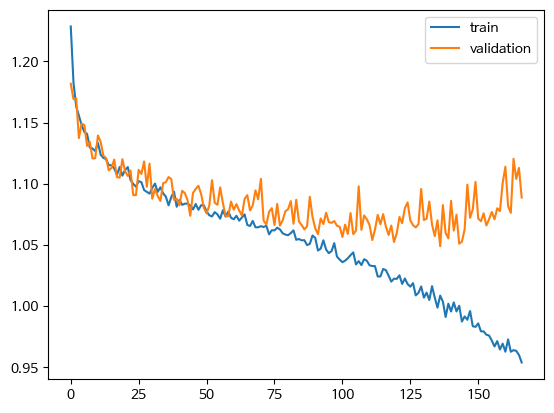

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 4-2. 1-D CNN

In [ ]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 18s 157ms/step - loss: 1.3826 - accuracy: 0.4308 - val_loss: 1.1164 - val_accuracy: 0.5121
Epoch 2/1000
93/93 [==============================] - 10s 108ms/step - loss: 0.9676 - accuracy: 0.5924 - val_loss: 0.9519 - val_accuracy: 0.5701
Epoch 3/1000
93/93 [==============================] - 8s 82ms/step - loss: 0.7130 - accuracy: 0.6987 - val_loss: 0.8882 - val_accuracy: 0.6442
Epoch 4/1000
93/93 [==============================] - 7s 75ms/step - loss: 0.5284 - accuracy: 0.8003 - val_loss: 1.1442 - val_accuracy: 0.6375
Epoch 5/1000
93/93 [==============================] - 7s 73ms/step - loss: 0.4255 - accuracy: 0.8313 - val_loss: 1.6458 - val_accuracy: 0.6402
Epoch 6/1000
93/93 [==============================] - 5s 49ms/step - loss: 0.3204 - accuracy: 0.8799 - val_loss: 1.7315 - val_accuracy: 0.6469
Epoch 7/1000
93/93 [==============================] - 5s 54ms/step - loss: 0.2433 - accuracy: 0.9163 - val_loss: 2.1366 - val_accuracy: 0.

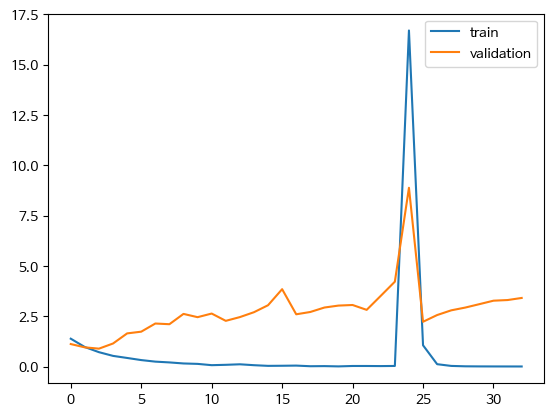

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
max_words = 2993
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          383104    
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 128)           41088     
                                                             

In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 5s 14ms/step - loss: 1.4210 - accuracy: 0.4207 - val_loss: 1.3878 - val_accuracy: 0.4272
Epoch 2/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3913 - accuracy: 0.4278 - val_loss: 1.3583 - val_accuracy: 0.4272
Epoch 3/1000
93/93 [==============================] - 1s 7ms/step - loss: 1.3383 - accuracy: 0.4295 - val_loss: 1.3374 - val_accuracy: 0.4259
Epoch 4/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3308 - accuracy: 0.4312 - val_loss: 1.3324 - val_accuracy: 0.4259
Epoch 5/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3390 - accuracy: 0.4305 - val_loss: 1.3534 - val_accuracy: 0.4286
Epoch 6/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3319 - accuracy: 0.4291 - val_loss: 1.3330 - val_accuracy: 0.4259
Epoch 7/1000
93/93 [==============================] - 1s 8ms/step - loss: 1.3284 - accuracy: 0.4312 - val_loss: 1.3332 - val_accuracy: 0.4259
Epoch

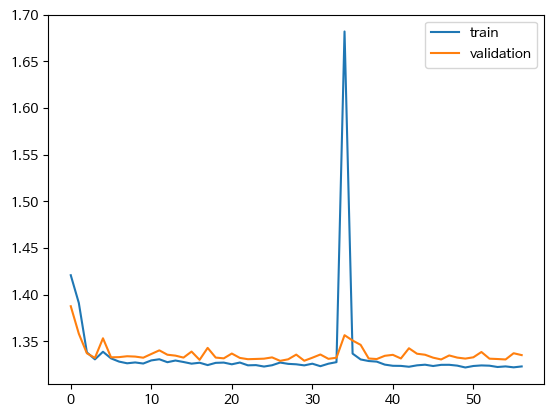

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 4-3. LSTM

In [ ]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 23s 176ms/step - loss: 1.2531 - accuracy: 0.4659 - val_loss: 1.0270 - val_accuracy: 0.5620
Epoch 2/1000
93/93 [==============================] - 11s 118ms/step - loss: 0.9038 - accuracy: 0.6272 - val_loss: 0.9480 - val_accuracy: 0.6132
Epoch 3/1000
93/93 [==============================] - 8s 89ms/step - loss: 0.6988 - accuracy: 0.7244 - val_loss: 0.9408 - val_accuracy: 0.6280
Epoch 4/1000
93/93 [==============================] - 8s 87ms/step - loss: 0.5454 - accuracy: 0.7932 - val_loss: 0.9642 - val_accuracy: 0.6469
Epoch 5/1000
93/93 [==============================] - 7s 71ms/step - loss: 0.4260 - accuracy: 0.8404 - val_loss: 0.9674 - val_accuracy: 0.6563
Epoch 6/1000
93/93 [==============================] - 6s 63ms/step - loss: 0.3223 - accuracy: 0.8860 - val_loss: 1.0170 - val_accuracy: 0.7008
Epoch 7/1000
93/93 [==============================] - 4s 48ms/step - loss: 0.2388 - accuracy: 0.9271 - val_loss: 1.0536 - val_accuracy: 0.

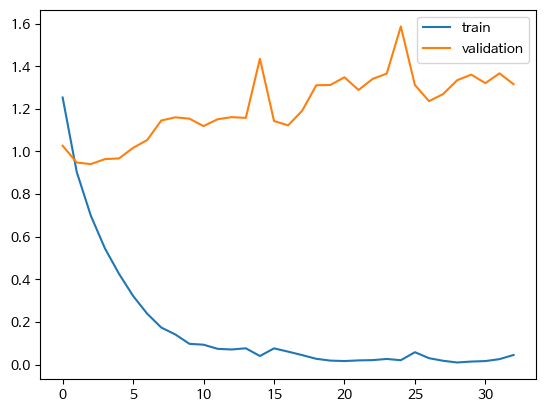

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
max_words = 2993
embedding_dim = 128


# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(100,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          383104    
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 50, 64)            33024     
                                                             

In [ ]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(w2v_x_train, y_train, validation_data=(w2v_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 8s 27ms/step - loss: 1.4126 - accuracy: 0.4170 - val_loss: 1.3873 - val_accuracy: 0.4272
Epoch 2/1000
93/93 [==============================] - 2s 17ms/step - loss: 1.3921 - accuracy: 0.4278 - val_loss: 1.3877 - val_accuracy: 0.4272
Epoch 3/1000
93/93 [==============================] - 2s 20ms/step - loss: 1.3899 - accuracy: 0.4278 - val_loss: 1.3949 - val_accuracy: 0.4272
Epoch 4/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3914 - accuracy: 0.4278 - val_loss: 1.3908 - val_accuracy: 0.4272
Epoch 5/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3936 - accuracy: 0.4278 - val_loss: 1.3892 - val_accuracy: 0.4272
Epoch 6/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3886 - accuracy: 0.4278 - val_loss: 1.3911 - val_accuracy: 0.4272
Epoch 7/1000
93/93 [==============================] - 1s 13ms/step - loss: 1.3913 - accuracy: 0.4278 - val_loss: 1.3883 - val_accuracy: 0.4272

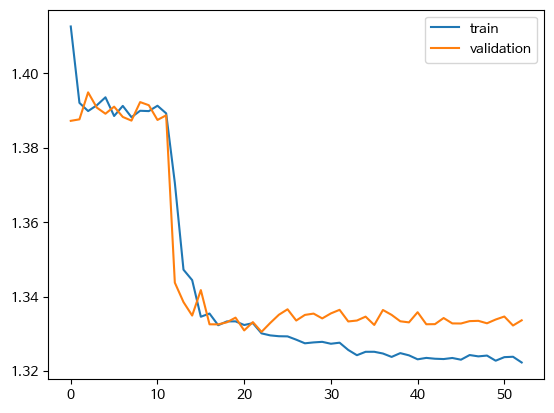

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 4-4. Bidirectional

In [10]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Flatten()(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [11]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 46s 253ms/step - loss: 1.2153 - accuracy: 0.4875 - val_loss: 0.9517 - val_accuracy: 0.5863
Epoch 2/1000
93/93 [==============================] - 16s 166ms/step - loss: 0.8258 - accuracy: 0.6603 - val_loss: 0.9374 - val_accuracy: 0.6119
Epoch 3/1000
93/93 [==============================] - 11s 117ms/step - loss: 0.6243 - accuracy: 0.7426 - val_loss: 0.9014 - val_accuracy: 0.6361
Epoch 4/1000
93/93 [==============================] - 10s 110ms/step - loss: 0.4313 - accuracy: 0.8364 - val_loss: 1.3292 - val_accuracy: 0.6415
Epoch 5/1000
93/93 [==============================] - 10s 108ms/step - loss: 0.3493 - accuracy: 0.8647 - val_loss: 1.1689 - val_accuracy: 0.6752
Epoch 6/1000
93/93 [==============================] - 8s 86ms/step - loss: 0.2048 - accuracy: 0.9275 - val_loss: 1.5668 - val_accuracy: 0.6806
Epoch 7/1000
93/93 [==============================] - 6s 67ms/step - loss: 0.1580 - accuracy: 0.9474 - val_loss: 1.5374 - val_accura

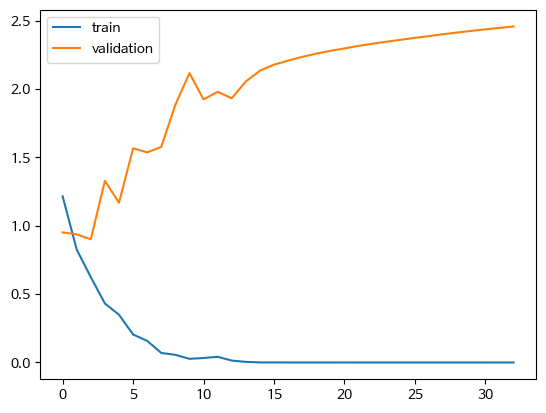

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [14]:
max_words = 9425 - 3510 + 1
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(400,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Dense(32, activation='swish')(hl)
hl = Flatten()(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 128)          757248    
                                                                 
 conv1d (Conv1D)             (None, 400, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 400, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 128)          41088     
                                                             

In [15]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(seq_x_train, y_train, validation_data=(seq_x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
93/93 [==============================] - 26s 183ms/step - loss: 1.2901 - accuracy: 0.4632 - val_loss: 1.0246 - val_accuracy: 0.5539
Epoch 2/1000
93/93 [==============================] - 12s 130ms/step - loss: 0.8636 - accuracy: 0.6434 - val_loss: 0.9001 - val_accuracy: 0.6523
Epoch 3/1000
93/93 [==============================] - 9s 91ms/step - loss: 0.6272 - accuracy: 0.7402 - val_loss: 0.9147 - val_accuracy: 0.6402
Epoch 4/1000
93/93 [==============================] - 8s 81ms/step - loss: 0.4744 - accuracy: 0.8232 - val_loss: 1.1804 - val_accuracy: 0.6375
Epoch 5/1000
93/93 [==============================] - 8s 88ms/step - loss: 0.3406 - accuracy: 0.8752 - val_loss: 1.3109 - val_accuracy: 0.6819
Epoch 6/1000
93/93 [==============================] - 5s 58ms/step - loss: 0.2063 - accuracy: 0.9281 - val_loss: 1.3683 - val_accuracy: 0.6954
Epoch 7/1000
93/93 [==============================] - 6s 62ms/step - loss: 0.1342 - accuracy: 0.9551 - val_loss: 1.3190 - val_accuracy: 0.

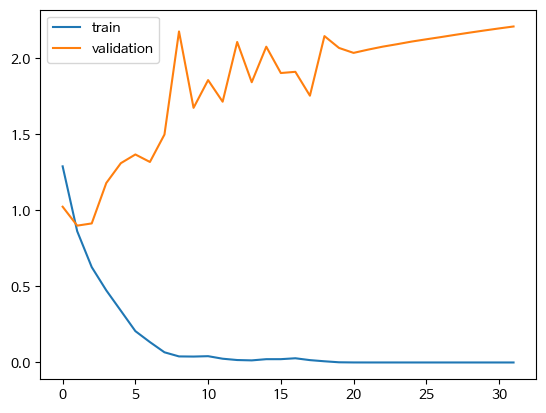

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)

### Tensorflow Hub BERT 따라해보기

In [9]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.9 MB/s eta 0:00:00


In [10]:
!pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 35.9 MB/s eta 0:00:00


In [14]:
!pip install --upgrade tensorflow-estimator==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0


In [19]:
!pip install --upgrade tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.1
    Uninstalling tensorflow-2.11.1:
      Successfully uninstalled tensorflow-2.11.1


In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [9]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/train.csv'
data = pd.read_csv(data_path)

In [67]:
x_train = data.loc[:, 'text']
y_train = data.loc[:, 'label']

label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
y_train = y_train.replace(label_dict)

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023, stratify=y_train)

In [15]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [16]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [17]:
text_test = ['문의 드립니다.']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101  1459 30014 30021 29999 30018  1457 30017 29994 30019 30024 29992]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [19]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.943975    0.8552522  -0.01108387  0.05615659  0.14601682  0.9708972
  0.92591333 -0.85223    -0.19265285 -0.977042   -0.389131   -0.988243  ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.23536703 -0.49567327  1.7070262  ...  0.6776589   0.5509893
   0.32712656]
 [ 0.13348515 -0.8442761  -0.5773796  ... -0.17722273  0.3837366
   0.5196121 ]
 [-0.06307748 -1.5678849   0.13403457 ... -0.06352171  0.78123736
   0.33771035]
 ...
 [-0.00882399 -1.3209912  -0.3767376  ...  0.09097938  0.49728405
   0.5945735 ]
 [-0.2257164  -0.55903924  0.7733698  ...  0.25931057  1.0274209
   0.484341  ]
 [-0.7415943   0.3479411   0.76872194 ... -0.77952623  0.64773774
   0.61189884]]


In [59]:
def build_classifier_model():
    tf.keras.backend.clear_session()
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(5, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [75]:
classifier_model = build_classifier_model()
# bert_result = classifier_model(tf.constant(text_test))
# print(bert_result)

In [70]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

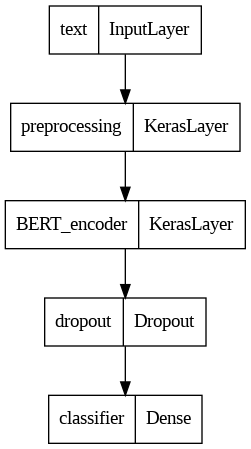

In [71]:
tf.keras.utils.plot_model(classifier_model)

In [78]:
classifier_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [79]:
es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1)

In [80]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x_train, y_train,
                               validation_data=(x_val, y_val),
                               epochs=10,
                               callbacks=[es])

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
93/93 [==============================] - 44s 315ms/step - loss: 1.5030 - accuracy: 0.3927 - val_loss: 1.2201 - val_accuracy: 0.4798
Epoch 2/10
93/93 [==============================] - 30s 321ms/step - loss: 1.2710 - accuracy: 0.4669 - val_loss: 1.3001 - val_accuracy: 0.4515
Epoch 3/10
93/93 [==============================] - 28s 298ms/step - loss: 1.3574 - accuracy: 0.4379 - val_loss: 1.2869 - val_accuracy: 0.4232
Epoch 4/10
93/93 [==============================] - 29s 305ms/step - loss: 1.3287 - accuracy: 0.4629 - val_loss: 1.3069 - val_accuracy: 0.4542
Epoch 5/10
93/93 [==============================] - 29s 310ms/step - loss: 1.4773 - accuracy: 0.3796 - val_loss: 1.3942 - val_accuracy: 0.4272
Epoch 6/10
93/93 [==============================] - 27s 287ms/step - loss: 1.4583 - accuracy: 0.3930 - val_loss: 1.4666 - val_accuracy: 0.4272
Epoch 6: early stopping


### BERT

In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.8 MB/s eta 0:00:00


In [35]:
import torch
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences

import time
import datetime

In [12]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/train.csv'
data = pd.read_csv(data_path)

x_train = data.loc[:, 'text']
y_train = data.loc[:, 'label']

label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
y_train = y_train.replace(label_dict)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023, stratify=y_train)

In [13]:
# Bert 용 전처리
train_sentences = ['[CLS] ' + str(s) + ' [SEP]' for s in x_train]
val_sentences = ['[CLS] ' + str(s) + ' [SEP]' for s in x_val]
train_sentences[:5]

["[CLS] 안녕하세요 질문드립니다!\n\nstu01 = {\n    'no': 1,\n    'name': '홍길동',\n    'score': [92, 96, 98]\n    'mean': 95.3333333\n}\n\nprint(f'학생 1의 평균 점수는 {stu01['mean']:.2f}입니다.')\n\n위와 같이 딕셔너리를 만들고 mean에 대하여 소수점 둘째자리까지 출력하려고 하는데\n위 print문과 같이 f-string을 이용해서 출력하면 안 되는 걸까요? 신택스 에러가 뜹니다. 감사합니다. [SEP]",
 '[CLS] # 5) 검증 : 예측\npl = ml.predict(x_val)\npl\n\npl_real = pl * (y_train.max() - y_train.min()) + y_train.min()\npl_real\n\n예측단계에서 pl_real이 실제 값이라고 하신것도 잘 이해가 안갑니다\n곡선자체가 강사님이랑 좀 다르게나온거같은데 뭔가 잘못한걸까요? [SEP]',
 '[CLS] 지금 현재 문자열에서 float으로 변환 하는 것은 불가능으로 보입니다.  총 생활 인구수를 예측하기 위한 컬럼, 예측하기 위해서 만든 shift를 이용한 컬럼을 제외한 날짜 시간 컬럼은 지워도 되는 것으로 보입니다:)\n\nshift 열이 현재 int64[ns] 형식인데 얘도 지우고 기준일 ID도 다 지우라는 말씀이시죠? [SEP]',
 '[CLS] kubeadm join 제꺼 복붙하고 \n입력했는데 저렇게 중간에 잘리고 -bash: kubeadm: No such file or directory 뜨고 저런 상태가 되었는데 어떻게 하나요? [SEP]',
 '[CLS] 수치화 과정에서 Age 열에 결측치가 있어 결측치를 제거했더니(첨부파일: 수치화-1) 강사님의 결과(첨부파일: 수치화-2)와 다르게 나왔습니다. 결측치를 제거해주지 않고 실행하면 NaN으로 결과값이 나옵니다.\n어떻게 해결해야 하는지 도움 부탁드립니다. [SEP]']

In [14]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
result = tokenizer.tokenize('안녕하세요.')
print(result)

['안', '##녕', '##하', '##세', '##요', '.']


In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_train = [tokenizer.tokenize(s) for s in train_sentences]
tokenized_val = [tokenizer.tokenize(s) for s in val_sentences]

In [16]:
ids_train = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_train]
ids_val = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_val]

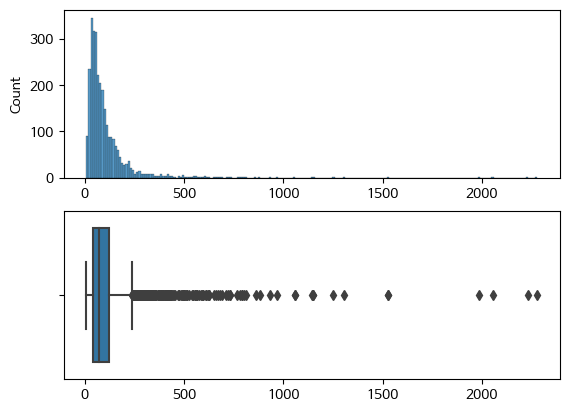

count    2964.000000
mean      107.767206
std       141.862474
min         8.000000
25%        43.000000
50%        71.000000
75%       122.000000
max      2278.000000
dtype: float64

In [17]:
temp = [len(x) for x in ids_train]
plt.subplot(2, 1, 1)
sns.histplot(temp)
plt.subplot(2, 1, 2)
sns.boxplot(x=temp)
plt.show()
pd.Series(temp).describe()

In [18]:
MAX_LEN = 256 # 최대 길이
pad_train = pad_sequences(
    ids_train, maxlen=MAX_LEN, padding="post", truncating="post"
)
pad_val = pad_sequences(
    ids_val, maxlen=MAX_LEN, padding="post", truncating="post"
)

In [19]:
# Attention Mask 만들기
# 단어 부분은 1, 0으로 패딩된 부분은 0

attention_masks_train = []
for seq in pad_train:
    seq_mask = [float(i > 0) for i in seq]
    attention_masks_train.append(seq_mask)

attention_masks_val = []
for seq in pad_val:
    seq_mask = [float(i > 0) for i in seq]
    attention_masks_val.append(seq_mask)

In [20]:
train_inputs = torch.tensor(pad_train)
train_masks = torch.tensor(attention_masks_train)
train_labels = torch.tensor(y_train.values)

val_inputs = torch.tensor(pad_val)
val_masks = torch.tensor(attention_masks_val)
val_labels = torch.tensor(y_val.values)

In [21]:
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = RandomSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [22]:
# GPU 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [23]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=5)
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [24]:
# 옵티마이저
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률(learning rate)
                  eps = 1e-8 
                )

# 에폭수
epochs = 10

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [25]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)
    
    
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [27]:
#랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#그래디언트 초기화
model.zero_grad()

# 학습
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in val_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...

  Average training loss: 0.48
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.77
  Validation took: 0:00:11

======== Epoch 2 / 10 ========
Training...

  Average training loss: 0.32
  Training epcoh took: 0:02:00

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:11

======== Epoch 3 / 10 ========
Training...

  Average training loss: 0.22
  Training epcoh took: 0:02:01

Running Validation...
  Accuracy: 0.84
  Validation took: 0:00:11

======== Epoch 4 / 10 ========
Training...

  Average training loss: 0.15
  Training epcoh took: 0:02:01

Running Validation...
  Accuracy: 0.83
  Validation took: 0:00:11

======== Epoch 5 / 10 ========
Training...

  Average training loss: 0.10
  Training epcoh took: 0:02:01

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:11

======== Epoch 6 / 10 ========
Training...

  Average training loss: 0.06
  Training epcoh took: 0:02:01

Running Validation...
  Accu

In [36]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

def test_sentences(sentences):
    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [37]:
x_val

2545    class Profile(models.Model):\n    User = model...
953     #2-3에서 WindowSearch.exe 를 치고나면\nThe system can...
2686    수업시간에 배운 머신러닝 모델의 종류는 \n\nlinear regression, l...
422     안녕하세요.\nx,y_train, val 나누고 CNN 설계 쪽으로 진행을 하면 되...
2049    튜토리얼 실습 때 filename = TUTORIAL_IMAGE + '/' + st...
                              ...                        
2883    안녕하세요 :) 오늘 수업을 듣고 몇 가지 의문 사항이 생겨서 질문드립니다!\n\n...
1410    안녕하세요,\n\n미니프로젝트 4차 마지막 날인 11월 1일에 셀프테스트가 예정되어...
655     안녕하세요. 이전부터 궁금했던 점이 있어서 질문 올립니다.\n\n주성분 분석을 시행...
2831    어제 올려드린 코드에서 index.html에서 받을 파일로 results 리스트를 ...
778     안녕하세요 amazon direct connection 기술에 대하여 질문 드리고 ...
Name: text, Length: 742, dtype: object

In [40]:
y_pred = test_sentences(x_val)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       317
           1       0.84      0.83      0.83       147
           2       0.77      0.72      0.74       146
           3       0.78      0.88      0.82       112
           4       0.86      0.95      0.90        20

    accuracy                           0.82       742
   macro avg       0.82      0.84      0.83       742
weighted avg       0.82      0.82      0.82       742



In [47]:
y_pred

array([[-1.4431756 ,  6.176588  , -1.3489597 , -1.1080967 , -0.35564488],
       [-1.6407763 ,  6.219572  , -1.2445452 , -1.0237453 , -0.34062386],
       [-0.8560811 , -1.0562131 ,  5.588415  , -1.900823  , -1.8045056 ],
       ...,
       [-1.3182164 , -1.3337768 ,  5.6220856 , -1.6347293 , -1.640038  ],
       [-0.2845792 ,  5.6314015 , -1.988645  , -0.9426189 , -0.55370635],
       [-1.4565504 ,  5.60914   ,  0.5533744 , -1.7821609 , -1.0504158 ]],
      dtype=float32)